In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#encoding for genre
df['Gender']=pd.get_dummies(df['Genre'],drop_first=True)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [4]:
x=df[['Age','Spending Score (1-100)']].values

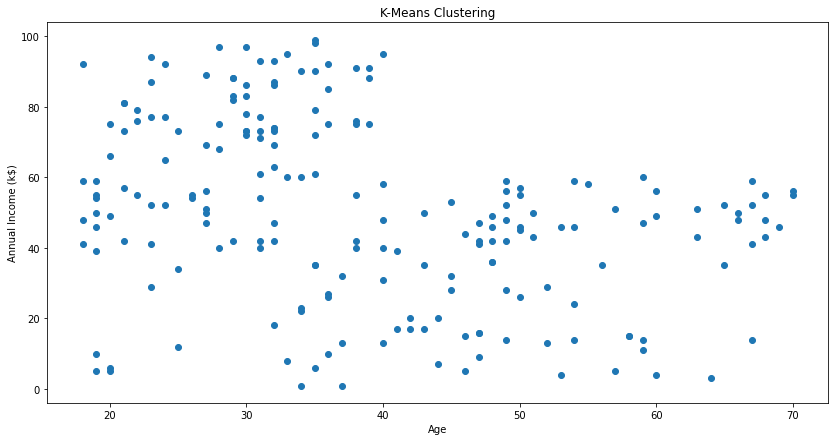

In [5]:
#plot of the data points with the color corresponding to the identified cluster
plt.figure(figsize=(14,7))
plt.scatter(x[:,0], x[:,1], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-Means Clustering')
plt.show()

In [6]:
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    wcss.append(kmeanModel.inertia_)

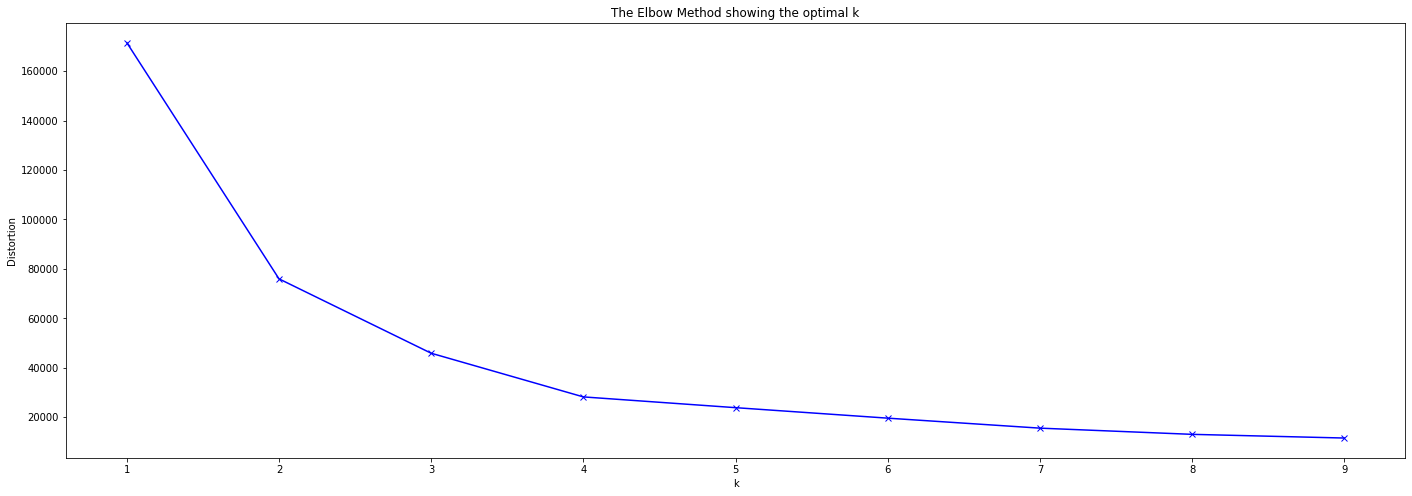

In [7]:
plt.figure(figsize=(24,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
kmeanModel = KMeans(n_clusters=4,init = 'k-means++')
kmeanModel.fit(x)

KMeans(n_clusters=4)

In [9]:
# Predicting labels for the feature set
identified_clusters = kmeanModel.fit_predict(x)
identified_clusters

array([1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 1,
       0, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 3, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

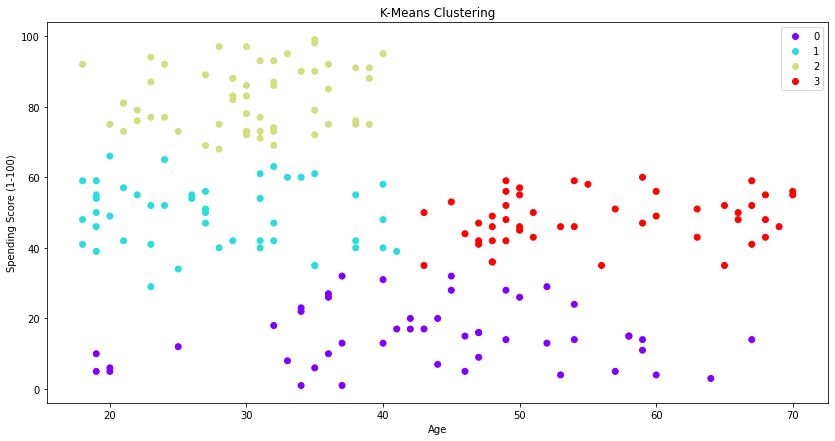

In [10]:
#plot of the data points with the color corresponding to the identified cluster
plt.figure(figsize=(14,7))
scatter=plt.scatter(x[:,0], x[:,1], c=identified_clusters, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3], loc="best");
plt.show()

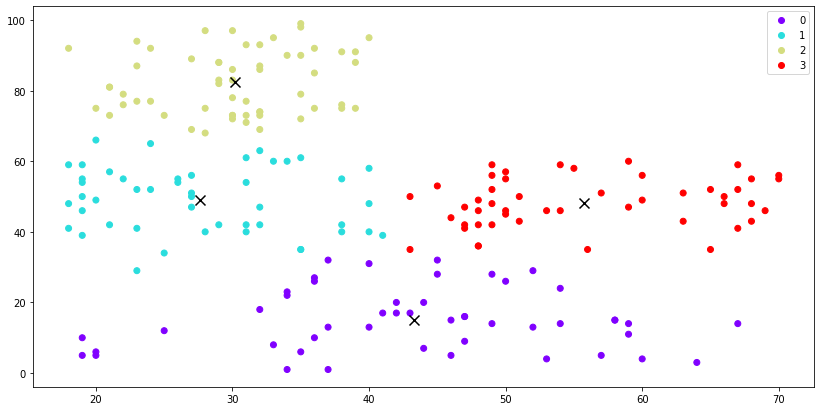

In [11]:
# plot of the centroids and the corresponding cluster
plt.figure(figsize=(14,7))
scatter=plt.scatter(x[:,0], x[:,1], c=identified_clusters, cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], s=100, c='black', marker='x')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3], loc="best");

Text(0.5, 1.0, 'Clustered Data')

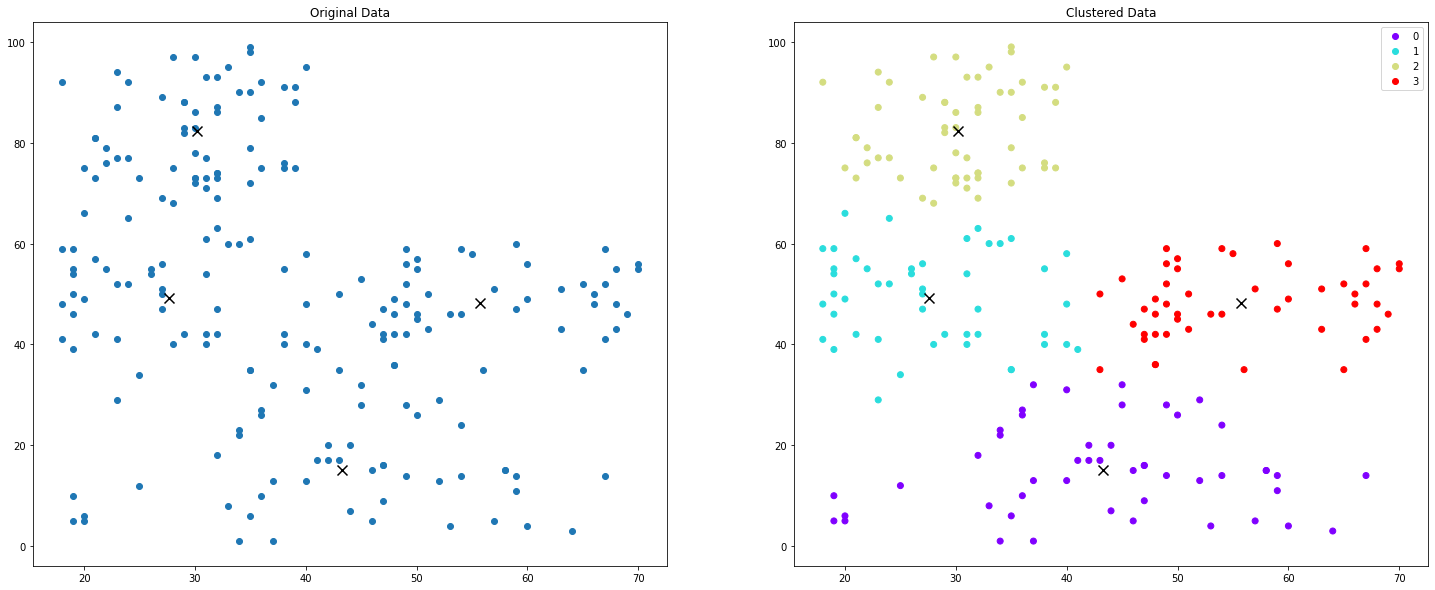

In [12]:
# We use the KMeans class to cluster the data, and then use the identified clusters to assign colors
# to the data points.
# subplots of original data and clustered data
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1], cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:,0],kmeanModel.cluster_centers_[:,1], s=100, c='black', marker='x')
plt.title('Original Data')
plt.subplot(1,2,2)
scatter=plt.scatter(x[:,0], x[:,1], c=identified_clusters, cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], s=100, c='black', marker='x')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3], loc="best");
plt.title('Clustered Data')

In [13]:
#intertia
iad=kmeanModel.inertia_
print(iad)

28165.583566629342


In [14]:
# Computing the distance between each of the cluster centers.
from sklearn.metrics.pairwise import euclidean_distances
dists = euclidean_distances(kmeanModel.cluster_centers_)
print(dists)

[[ 0.         37.55558429 68.59570136 35.45373061]
 [37.55558429  0.         33.30036617 28.10636563]
 [68.59570136 33.30036617  0.         42.61713086]
 [35.45373061 28.10636563 42.61713086  0.        ]]


In [32]:
tri_dists = dists[np.triu_indices(4, 1)]
#upper triangular matrix of distances
print(tri_dists)
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
print("Max distance:", max_dist)
print("Average distance:", avg_dist)
print("Min distance:", min_dist)
# The max, mean, and min distances are calculated from the upper triangle of the distance matrix.

[37.55558429 68.59570136 35.45373061 33.30036617 28.10636563 42.61713086]
Max distance: 68.59570135898556
Average distance: 40.93814648585539
Min distance: 28.10636563144839


In [33]:
import math
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []


for i in range(0, 4):
    print("inter cluster distance of points from cluster", i+1)
    for j in range(0,200):
        if  kmeanModel.labels_[j] == i:
            distance = math.dist(kmeanModel.cluster_centers_[i], x[j])
            if i==0:
                cluster1.append(distance)
            elif i==1:
                cluster2.append(distance)
            elif i==2:
                cluster3.append(distance)
            else:
                cluster4.append(distance)

inter cluster distance of points from cluster 1
inter cluster distance of points from cluster 2
inter cluster distance of points from cluster 3
inter cluster distance of points from cluster 4


In [34]:
dunn=min_dist/max(max(cluster1),max(cluster2),max(cluster3),max(cluster4))
print("Dunn Index:", dunn)

Dunn Index: 1.0696019049144039


In [35]:
from sklearn.metrics import silhouette_score

In [36]:
# The silhouette score is a measure of how well a clustering performs. It is calculated by averaging
# the silhouette scores of each sample. The silhouette score is in the range [-1, 1]. A high
# silhouette score means that the clustering performs well.
sil = [0,0]
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

In [37]:
print(sil)

[0, 0, 0.4692341232501655, 0.45300127016521263, 0.49973941540141753, 0.43167500325197866, 0.4405479018621985, 0.4212938931368575, 0.4241949266765448, 0.40921989145832216, 0.41574171734741866]


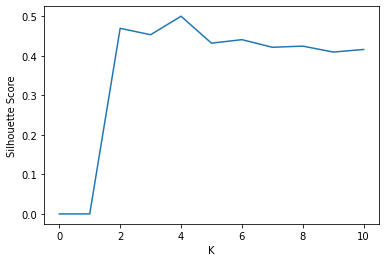

In [38]:
# Plotting the silhouette score for each value of k.
plt.plot(sil)
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.show()

In [39]:
def getBestCluster(X,_min=2,_max=10):
    '''
    :param X: The data to be clustered
    :param _min: the minimum number of clusters to try, defaults to 2 (optional)
    :param _max: The maximum number of clusters to consider, defaults to 10 (optional)
    :return: The best number of clusters
    '''
    selected_cluster = 0
    previous_sil_coeff = 0.001 #some random small number not 0
    sc_vals = []
    for n_cluster in range(_min, _max):
        kmeans = KMeans(n_clusters=n_cluster).fit(X)
        label = kmeans.labels_

        sil_coeff = silhouette_score(X, label, metric='euclidean', sample_size=1000)
        sc_vals.append(sil_coeff)
        print("For n_clusters=",n_cluster,", The Silhouette Coefficient is ",sil_coeff)

        percent_change = (sil_coeff-previous_sil_coeff)*100/previous_sil_coeff

        # return when below a threshold of 1%
        if percent_change<1:
            selected_cluster = n_cluster-1

        previous_sil_coeff = sil_coeff

    return selected_cluster or _max, sc_vals

In [40]:
getBestCluster(x)

For n_clusters= 2 , The Silhouette Coefficient is  0.4692341232501655
For n_clusters= 3 , The Silhouette Coefficient is  0.4530012701652126
For n_clusters= 4 , The Silhouette Coefficient is  0.49973941540141753
For n_clusters= 5 , The Silhouette Coefficient is  0.43535121034989693
For n_clusters= 6 , The Silhouette Coefficient is  0.44571861960523285
For n_clusters= 7 , The Silhouette Coefficient is  0.42313509747504796
For n_clusters= 8 , The Silhouette Coefficient is  0.429969838925614
For n_clusters= 9 , The Silhouette Coefficient is  0.41447652571263843


(8,
 [0.4692341232501655,
  0.4530012701652126,
  0.49973941540141753,
  0.43535121034989693,
  0.44571861960523285,
  0.42313509747504796,
  0.429969838925614,
  0.41447652571263843])

In [41]:
import scipy.cluster.hierarchy as sch

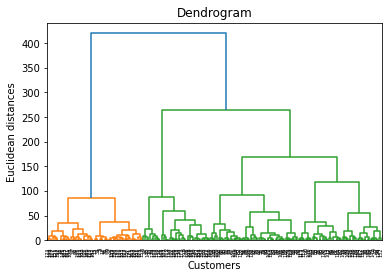

In [42]:
# The dendrogram is a diagram that shows the hierarchical relationship between objects. 
# The x-axis lists the objects being compared, 
# The y-axis lists the distance between the objects. 
# The farther apart the objects, the greater the dissimilarity. 
# The vertical line with the highest height is the most dissimilar object. 
# The vertical line with the lowest height is the most similar object. 
# The vertical line with the lowest height is the most similar object. 
# The vertical line with the lowest height
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [43]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(x)

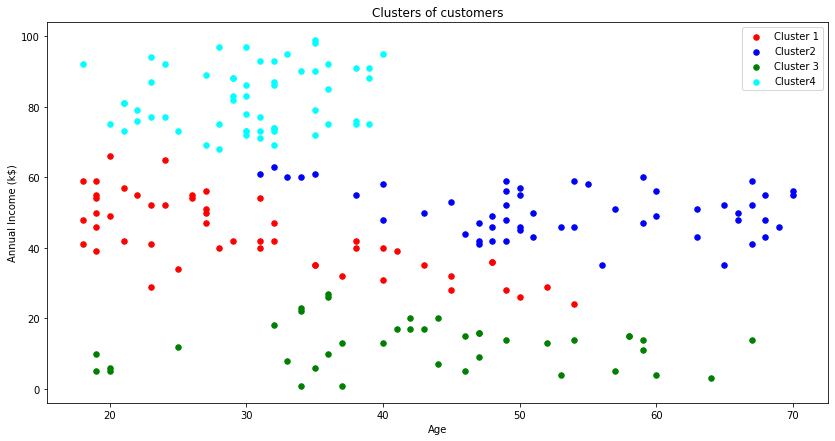

In [44]:
# Visualising the clusters
plt.figure(figsize=(14,7))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 30, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 30, c = 'cyan', label = 'Cluster4')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

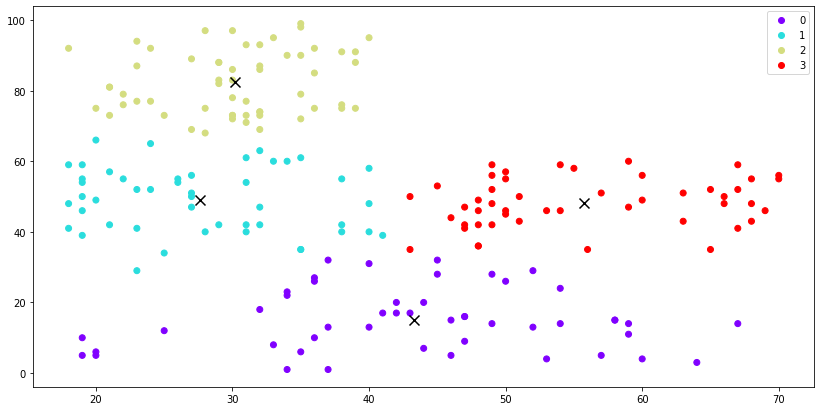

In [45]:
# plot of the centroids and the corresponding cluster
plt.figure(figsize=(14,7))
scatter=plt.scatter(x[:,0], x[:,1], c=identified_clusters, cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], s=100, c='black', marker='x')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3], loc="best");

Text(0, 0.5, 'Annual Income (k$)')

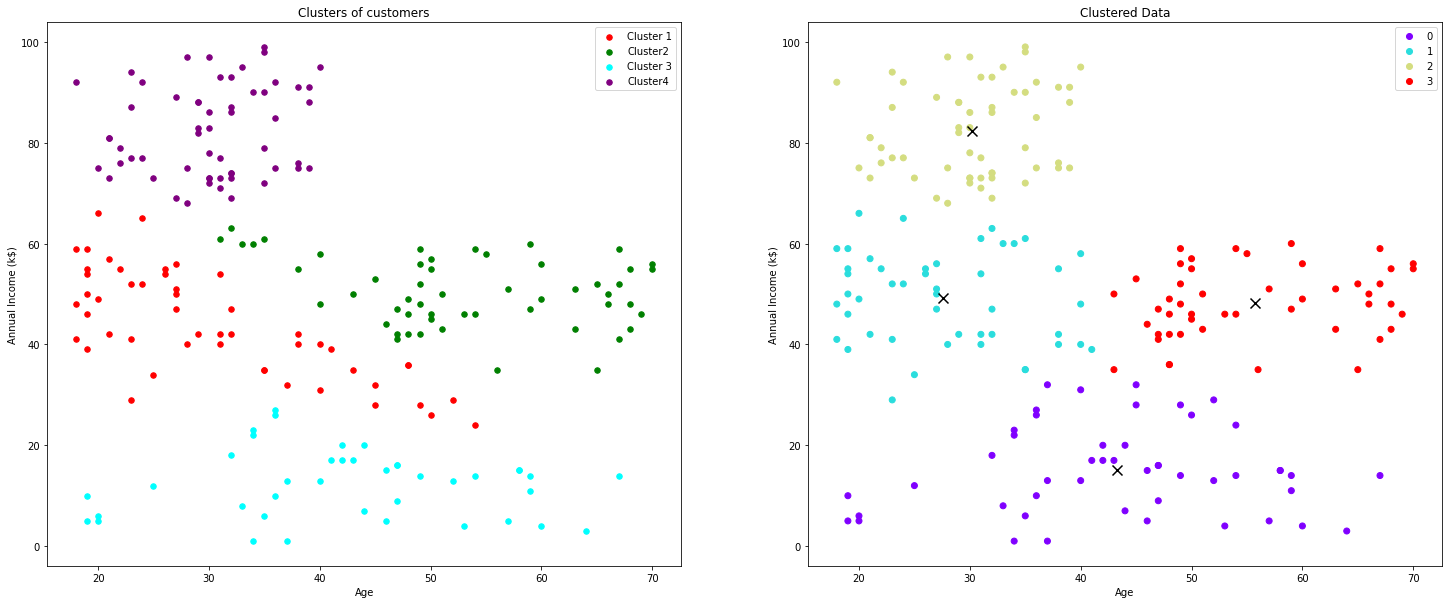

In [46]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 30, c = 'green', label = 'Cluster2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 30, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 30, c = 'purple', label = 'Cluster4')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.subplot(1,2,2)
scatter=plt.scatter(x[:,0], x[:,1], c=identified_clusters, cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], s=100, c='black', marker='x')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3], loc="best");
plt.title('Clustered Data')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

single


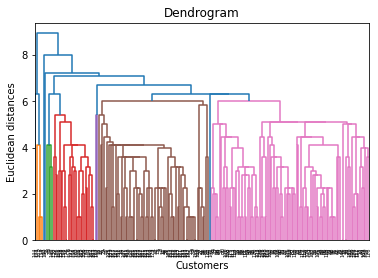

complete


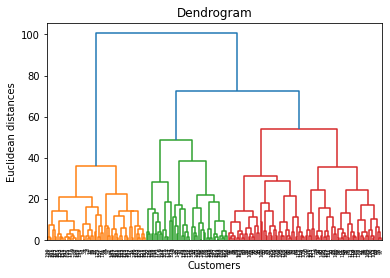

ward


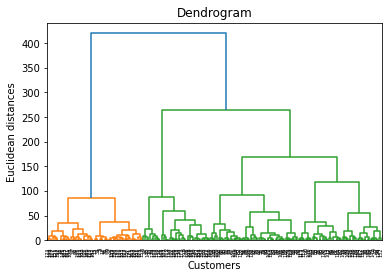

average


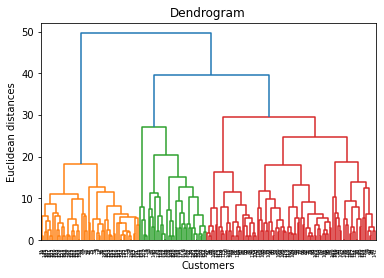

In [50]:
# A loop that iterates over the list `types` and prints the value of `i` in each iteration.
types=['single','complete','ward','average']
for i in types:
    print(i)
    dendrogram = sch.dendrogram(sch.linkage(x, method = i))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    
    plt.show()